In [1]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "online_retail_II"
df_2009 = pd.read_excel(file_path, sheet_name='Year 2009-2010')


In [2]:
# Step 2: Data Cleaning
df_clean = df_2009.dropna(subset=['Description', 'Customer ID'])
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['Price'] > 0)]
df_clean['Sales'] = df_clean['Quantity'] * df_clean['Price']


In [3]:
# Step 3: Simulate Profit and Calculate Profit Margin
df_clean['Profit'] = df_clean['Sales'] * 0.25  # Simulated 25% margin

profit_margin_df = df_clean.groupby('Description').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
profit_margin_df['ProfitMargin'] = (profit_margin_df['Profit'] / profit_margin_df['Sales']) * 100
profit_margin_df = profit_margin_df.sort_values('ProfitMargin')
profit_margin_df.head()


,Sales,Profit,ProfitMargin
Description,,,
DOORMAT UNION JACK GUNS AND ROSES,1084.75,271.1875,25.0
PINK SQUARE TABLE CLOCK,54.45,13.6125,25.0
PINK STAR CHRISTMAS DECORATION,78.12,19.5300,25.0
PINK STITCHED WALL CLOCK,187.50,46.8750,25.0
PINK STOCKING CHRISTMAS DECORATION,34.20,8.5500,25.0


In [4]:
# Step 4: Inventory Turnover Simulation
inventory_df = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'Profit': 'sum'
}).rename(columns={'Quantity': 'TotalQuantity'})
inventory_df['InventoryDays'] = 1000 / inventory_df['TotalQuantity']
inventory_df = inventory_df[inventory_df['InventoryDays'] < 100]


Correlation:
                InventoryDays    Profit
InventoryDays       1.000000 -0.197351
Profit             -0.197351  1.000000


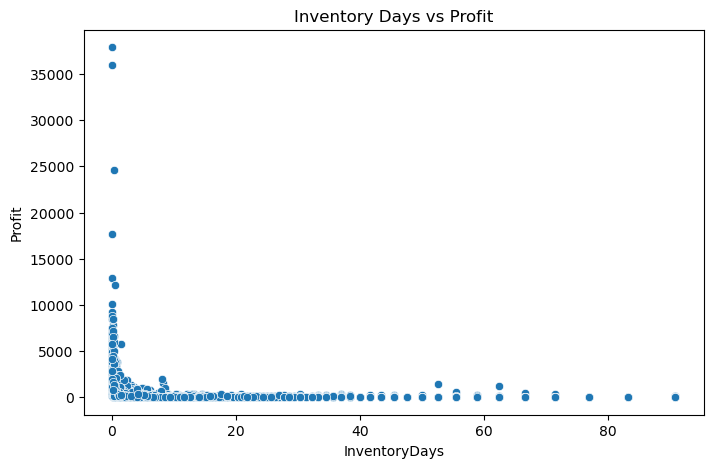

In [5]:
# Step 5: Correlation Between Inventory Days and Profit
correlation = inventory_df[['InventoryDays', 'Profit']].corr()
print("Correlation:\n", correlation)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=inventory_df, x='InventoryDays', y='Profit')
plt.title('Inventory Days vs Profit')
plt.show()


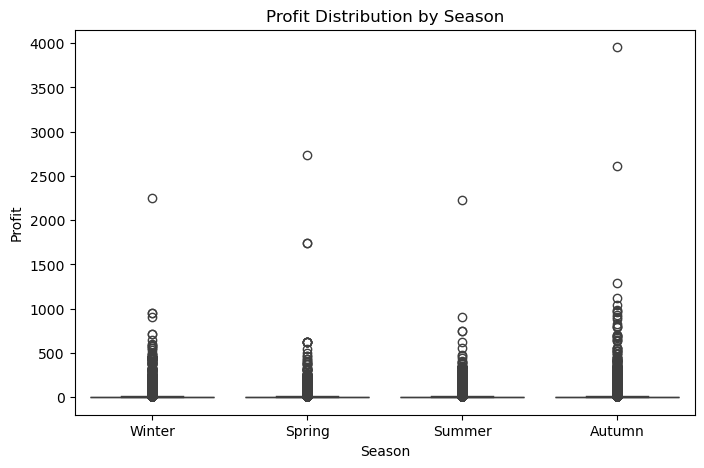

In [6]:
# Step 6: Seasonal Behavior Analysis
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Season'] = df_clean['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else
              'Autumn'
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Season', y='Profit')
plt.title("Profit Distribution by Season")
plt.show()


In [15]:
# Step 7: Export Cleaned Data for PowerBi
df_clean.to_csv("retail_cleaned_2009.csv", index=False)
